# Interaction Effects

Im folgenden werden wir einen Datensatz verwenden, um Interaktionseffekte zu untersuchen. Der Datensatz stammt aus @WARD1990AIDSKnowledgeFear.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/drinking.csv")
df.head()

,male,drink,gpa,malegpa
0,1,5,3.20,3.20
1,0,9,3.00,0.00
2,1,29,2.85,2.85
3,0,22,NaN,NaN
4,0,19,NaN,NaN


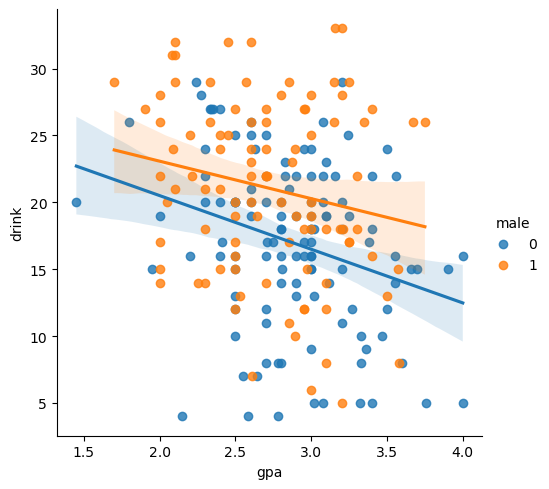

In [8]:
sns.lmplot(x='gpa', y='drink', data=df, hue="male")


## Modell 1

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \epsilon
$$



$$
\widehat{\text{drink}} = \hat{\beta}_0 + \hat{\beta}_1 \text{gpa}
$$

Erläutern Sie, was $\hat{\beta}_0$ und $\hat{\beta}_1$ in diesem Modell schätzen.

drink: л. бира на месец

beta_0 ? 
beta_1 ? 

In [9]:
m1 = ols("drink ~ gpa", data=df).fit()
m1.params


Intercept    30.443583
gpa          -4.138479
dtype: float64

## Modell 2

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \beta_2 \text{male} + \epsilon
$$

$$
\widehat{\text{drink}} = \hat{\beta}_0 + \hat{\beta}_1 \text{gpa} + \hat{\beta}_2 \text{male}
$$


Erläutern Sie, was $\hat{\beta}_0$, $\hat{\beta}_1$ und $\hat{\beta}_2$ in diesem Modell schätzen.


In [ ]:
df["gpa"].describe()

In [10]:
m2 = ols("drink ~ gpa + male", data=df).fit()
m2.params

Intercept    26.912491
gpa          -3.452900
male          3.535818
dtype: float64

## Modell 3

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \beta_2 \text{male} + \beta_3 \text{gpa} \times \text{male} + \epsilon
$$

$$
\widehat{\text{drink}} = \hat{\beta}_0 + \hat{\beta}_1 \text{gpa} + \hat{\beta}_2 \text{male} + \hat{\beta}_3 \text{gpa}\times \text{male}
$$


Erläutern Sie, was $\hat{\beta}_0$, $\hat{\beta}_1$, $\hat{\beta}_2$ und $\hat{\beta}_3$ in diesem Modell schätzen.

In [14]:
m3 = ols("drink ~ gpa*male", data=df).fit()
m3.params
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  drink   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     12.35
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.76e-07
Time:                        11:26:42   Log-Likelihood:                -707.34
No. Observations:                 218   AIC:                             1423.
Df Residuals:                     214   BIC:                             1436.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5221      3.740      7.627      0.000      21.151      35.893
gpa           -4.0112      1.282     -3.129      0.002      -6.538      -1.485
male           0.1488      5.348      0.028      0.978     -10.393      10.690
gpa:male       1.2121      1.889      0.642      0.522      -2.511       4.935
==============================================================================
Omnibus:                        6.531   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.367
Skew:                          -0.291   Prob(JB):                       0.0683
Kurtosis:                       2.498   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
m3p = m3.get_prediction().summary_frame()
m3p_with_ci = pd.concat([df, m3p], axis=1)
m3p_with_ci.head()

,male,drink,gpa,malegpa,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,5,3.20,3.20,19.713625,0.917598,17.904938,21.522312,7.232428,32.194822
1,0,9,3.00,0.00,16.488436,0.593608,15.318369,17.658503,4.083680,28.893192
2,1,29,2.85,2.85,20.693325,0.655452,19.401357,21.985293,8.276478,33.110172
3,0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='gpa', ylabel='drink'>

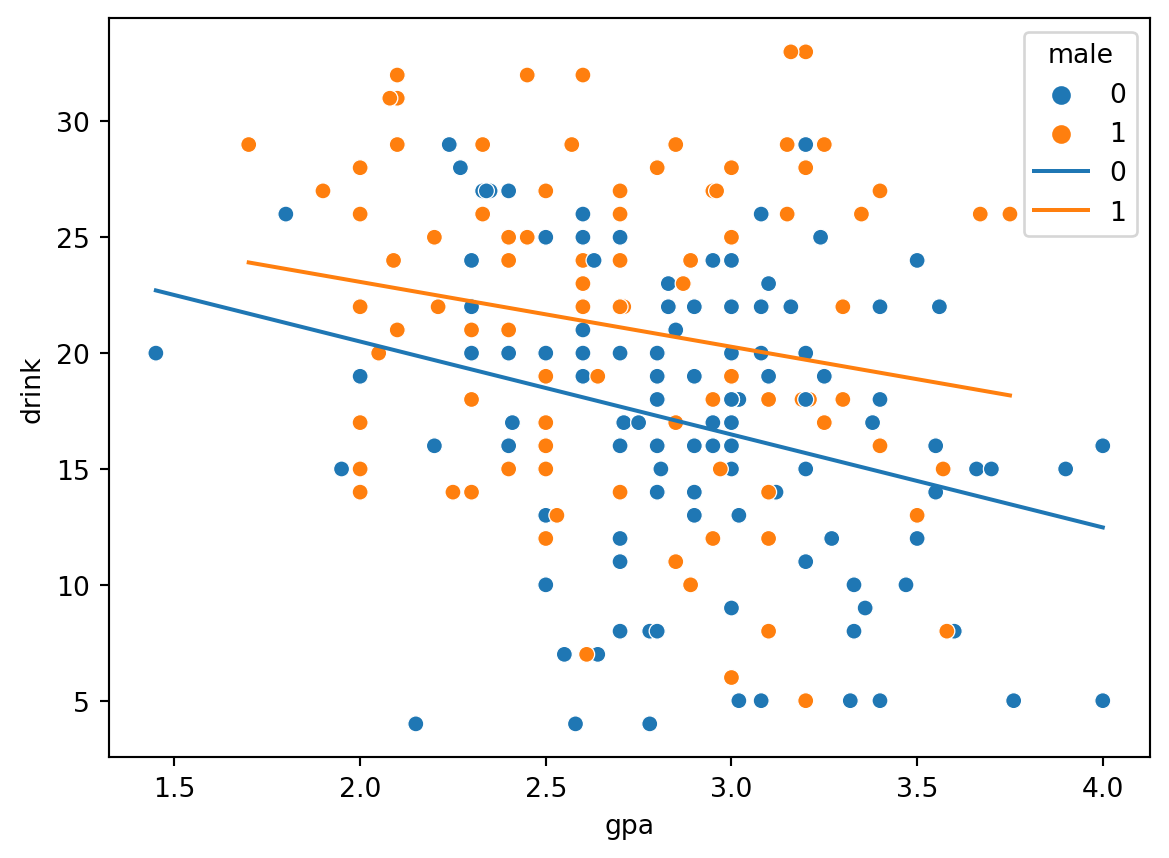

In [7]:
sns.scatterplot(x='gpa', y='drink', data=m3p_with_ci, hue="male")
sns.lineplot(x='gpa', y='mean', data=m3p_with_ci, hue="male")